## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

import seaborn as sns
import math 

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

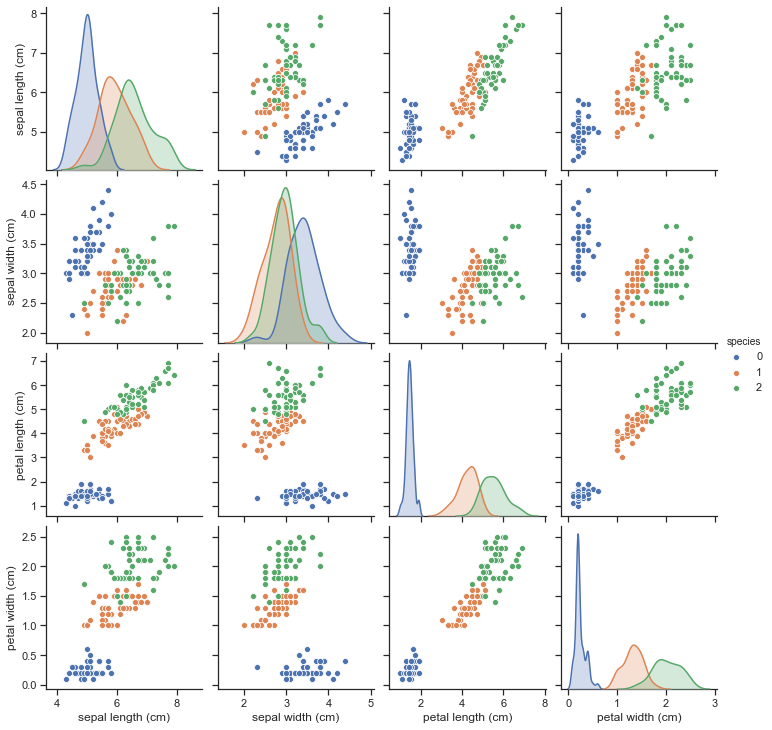

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [2]:
# define plotting function
def myplotGrid(X,y):
    '''display a diagram showing relationshop between X and y with subplots
        ---
        inputs:
            X: some data 
            y: labels
        Return:
            nil
            a diagram is draw as output
    '''
    last_row = [13,14,15,16]
    first_col = [0,4,8,12]
    fig = plt.figure(figsize=(16,16))
    colours = y
    n = 0
    
    l = len(selected_features)
    # iteratively access the data and creating the respective plot
    for i in range(0,l):
        for j in range(0,l):
            
            # generate a l by l grid of figures where l is the length of selected feature
            ax = fig.add_subplot(l,l,n+1) 
            
            # dispalying the axis name
            xlabels = selected_features[j]
            ylabels = selected_features[i]
            # only display horizontal axis on last row
            if n+1 in last_row:
                ax.set_xlabel(xlabels)
            
            # only display vertical axis on the first column
            if n in first_col:
                ax.set_ylabel(ylabels)
            
            # Ploting histogram on the of single feature on the on diagonal
            if i == j:
                for f in range(0,l):
                    plt.hist(X[:,i][np.where(y == f)]) 
            # ploting scatter plot everywhere else
            else:
                ax.scatter(X[:, j], X[:, i], c = colours)
                
            # move to the next plot
            n = n+1
    plt.show()

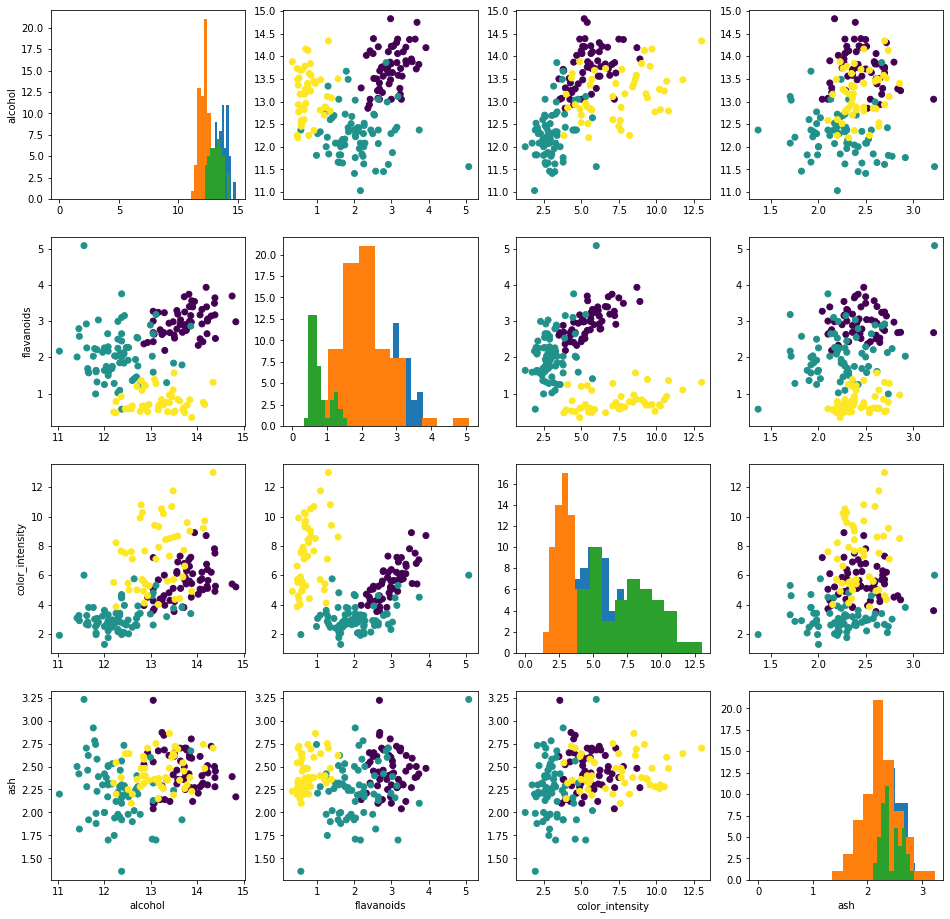

In [3]:
# run the plotting function
myplotGrid(X,y)


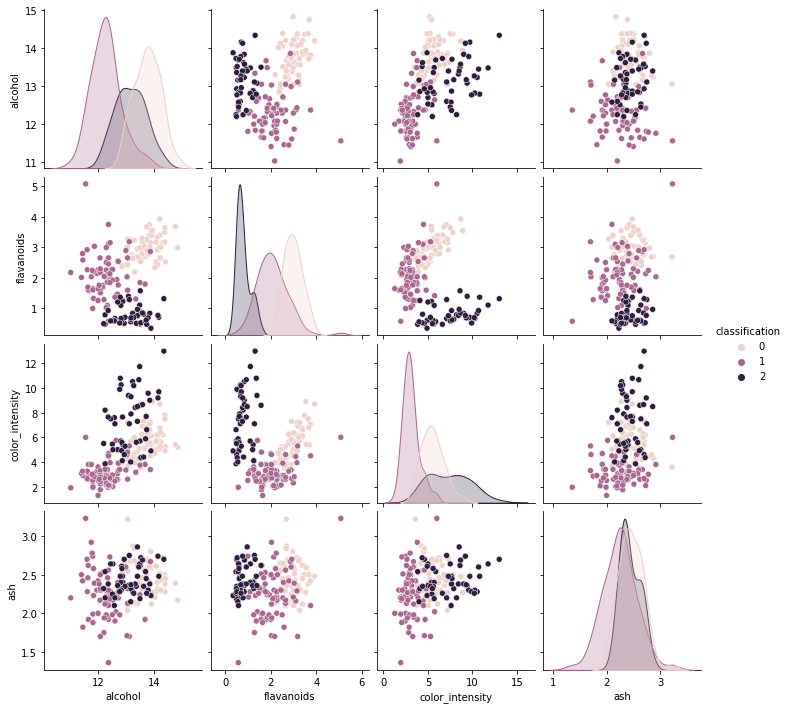

In [4]:
# a different implementation of the graph, using sns
df_target = pd.Series(wine.target, name ="classification")
df_wine = pd.DataFrame(X, columns =  selected_features)
df_new = pd.concat([df_wine, df_target], axis = 1)
df_new = df_wine.assign(classification = wine.target)

sns.pairplot(df_new, diag_kind="kde", hue = "classification")

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

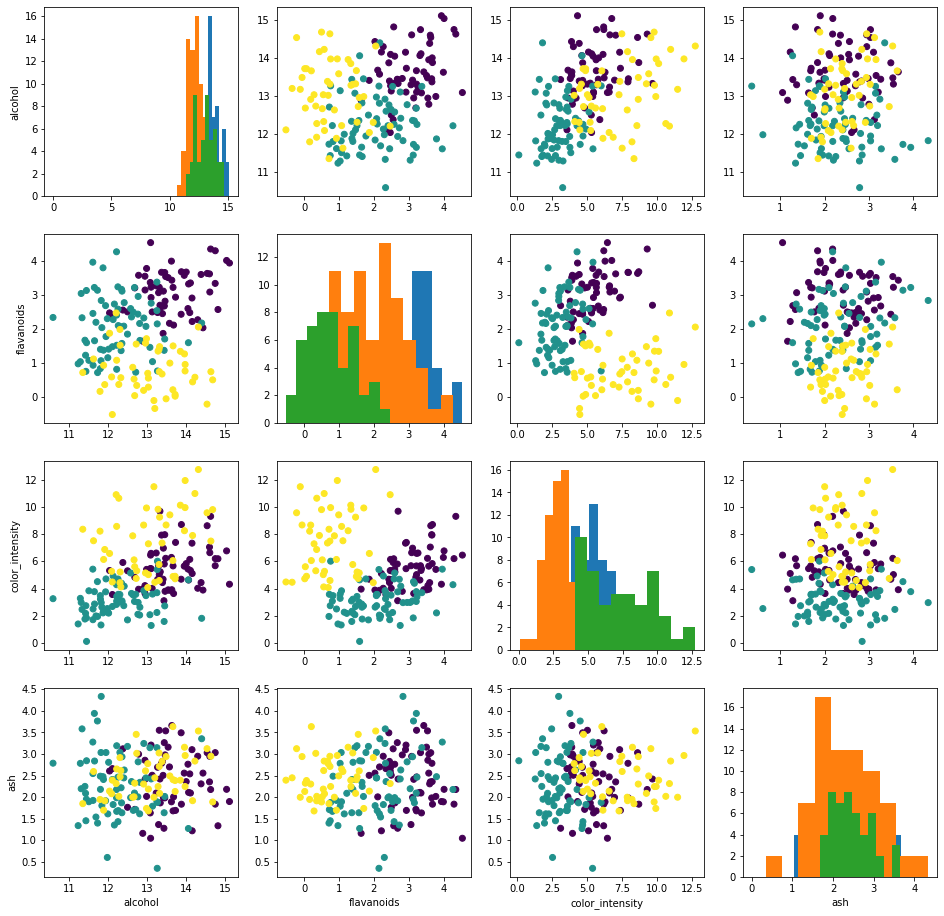

In [5]:
# noise code
# set a number to generate noise
mySeed= 12345

np.random.seed(mySeed)
XN=X+np.random.normal(0,0.6,X.shape)

#Plotting
myplotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer: Based on the above exploratory analysis, I would use flavanoids and colour intensity as the only two features for the classifier. 

As a classifier is used to predict the category of the input, it takes in some features as input and use these input to predict about the category of this input data. When choosing the features to train the classifier, it is essential to consider the <b>correlation</b> between the variable chosen and the classes of the wine. Unlike many other data, the scatter plot between the flavanoids and colour intensity showed a clear positive correlation between these two variables which means that flavanoids and colour intensity have strongly correlations with each other 

Moreover, for features in classfier, it is good for the features to be independent from one another. With reference to the scatter plot, it is clear that the data points of the three different classes are distinctively separated. This makes them very independent as well. Classfier can draw clear decision boundaries between the classes.

    


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer: Generally, both plotting resembles a similar trend. The shape of the scatter plot is quite similar to each other. Despite of the similarity, it is much <b>clearer to see the trend</b> in the data without noise. For the data with noise, the data points are further away from each other as compared to the data without noise, where they are more closely packed together.
The shape and pattern of the data can be more clearly observed for when they are closer together.

Moreover, the data with added Gaussian noise are also more spread out as compared to the data without noise. Using the ash data as an example, the orange data spread increased from between 1 to 3 to between 0 to 4. Similar observations can be made on other plot but less obviouse.


## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [6]:
# helper code
# finding distance
def cal_distance(a, b, type):
    '''calculate distance between two points
        ---
        Inputs:
            -a: data 1
            -b: data 2
            -type: method of calculation, manhattan or euclidean
        Outputs:
            -d: distance between these two points
    '''
    if type == 'euclidean':
        d = np.linalg.norm(a-b, axis=0)
        return d
    elif type == 'manhattan':
        d = 0
        for i in range(0,len(a)):
            d += math.fabs(a[i]-b[i])
        return d
# helper code
# train test split
def train_test_split(X,y,t):
    '''split data input and output based on a ratio
        ----
        Input:
            -X: input data
            -y: output data
            -t: test size between 0 and 1
        Output:
            -X_train: training data (input), array
            -X_test: test data
            -y_train: training data (output), array
            -y_test: testing data for the prediction
    
    '''
    # randomlise the input
    mySeed = 12345
    np.random.seed(mySeed)
    # change X to an array with evenly spaced elements as per the interval
    l = np.arange(X.shape[0])
    # change the sequence to be randome
    l = np.random.permutation(l)
    X = X[l]
    y = y[l]
    
    slice = int(len(X)*t) #slicing into train test based on input
    # 0 to slice be the test data
    X_test = X[0:slice]
    y_test = y[0:slice]
    
    # slice to the end be the train data
    X_train = X[slice:]
    y_train = y[slice:]
    return (X_train, X_test, y_train, y_test)

In [7]:
# mykNN code
def myKNN(X_train,y_train,X_test,k,type):
    '''returns an array of prediction based on the traing data
        -----
        Inputs:
            -X_train: training data (input), array
            -y_train: training data (output), array
            -X_test: test data
            -k: the number of nearest neighbour
            -type: type of distance to be calculated, accept euclidian or manhattan
        outputs:
            -predicted output value
    
    '''
    predition = []
    
    for x in X_test:
        neighbours=[[],[]]
        if type == 'euclidean':
            distance = [cal_distance(x, i, 'euclidean') for i in X_train]
        elif type == 'manhattan':
            distance = [cal_distance(x, i, 'manhattan') for i in X_train]
        # find the indice of the k nearest in neighbour
        kn_indice = np.argsort(distance)[:k]
        # use the indice to get their label
        kn_label = [y_train[m] for m in kn_indice]
        count = np.bincount(kn_label) # count the number of label
        predition.append(np.argmax(count))
    return np.array(predition)

X_train, X_test, y_train, y_test = train_test_split(X,y,0.5)

# calculate the predicted y
y_ =myKNN(X_train,  y_train,X_test, 2,'manhattan')
print(f"predicted y value:{y_} Real y value: {y_test}")

predicted y value:[1 1 2 0 2 0 1 1 2 2 1 1 1 0 0 0 1 1 1 2 2 1 2 2 1 0 2 1 2 0 0 0 2 0 0 0 0
 0 2 0 2 2 0 2 0 0 1 0 1 1 0 1 2 0 1 1 1 1 0 0 0 1 0 0 1 1 0 2 1 0 1 1 2 2
 1 1 0 1 0 1 2 0 1 2 1 2 0 0 0] Real y value: [1 1 2 0 2 0 1 1 2 2 1 1 1 0 0 0 1 1 1 1 2 1 2 2 1 0 2 1 2 0 0 0 2 0 0 0 0
 1 2 0 2 2 0 2 0 0 1 0 2 1 0 1 2 0 1 1 1 1 0 0 1 1 0 0 1 1 0 2 1 0 1 1 2 2
 1 1 0 1 1 1 2 1 1 2 1 2 0 0 1]


## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [8]:
# check for the classes in the data
classes = np.unique(y_)
classes

array([0, 1, 2], dtype=int64)

In [9]:
# confusion matrix, accuracy, precision, recall, etc. 
# condusion matrix
def confusionMx(y_test,y_pred,classN):
    '''returns a confusion matrix based on the test and pred value of kNN
        -------
        Inputs:
            -y_test: label for test data, array
            -y_pred: predicted value, array
            -classN: no. of class
        Returns:
            -conM: confusion matrix sized n*n
        -------
    '''
    # Initiate an n dimentional square matrix of zero
    ConM = np.zeros((classN, classN))
    # Iteratively check for the predicted value and update the matrix with result
    l = len(y_pred)
    for pred in range (0, l):
        ConM[y_test[pred]][y_pred[pred]] += 1
    return ConM

# accuracy
def accuracy(y_test,y_pred):
    '''calculate the accuracy using the test value and predicted value of the KNN output
    -------
    Inputs:
        -y_test: the correct data set that should be predicted
        -y_pred: kNN output of the prediction result 
    Returns:
        -an accuracy rate bewteen 0 and 1 with 0 being least accurate and 1 been most accurate
    -------
    '''
    # find the correct prediction
    corr = np.where(y_test==y_pred)
    # size of correct prediction and total predictions
    size_pred = len(y_pred)
    size_corr = len(y_test[corr])
    # calculate rate of correct
    rate = size_corr/size_pred
    return rate

#presison (true positive/ true positive + false positive)
def precision(y_test, y_pred):
    '''calculate the precision based on test and predicted value of the KNN output
    -------
    Inputs:
        -y_test: the correct data set that should be predicted
        -y_pred: kNN output of the prediction result
    Returns:
        -a precision rate bewteen 0 and 1 with 0 being least precise and 1 been most precise
    -------
    '''
    # create an array for the class of data (clas is used as class has other meaning)
    clas = np.unique(y_pred)
    # assumed wrong unless prevent precise, 0 to indicate wrong
    rate = np.zeros(clas.shape)
    
    # create confusion matrix size class*class
    ConMX = confusionMx(y_test,y_pred,len(clas))
    
    # iteratively check for the match one
    c = len(clas)
    for i in range (0,c):
        # positive variable, true positive combined​with false positive 
        # set number of positive to be 0
        positive = 0
        for j in clas:
            positive += ConMX[j][i]
        true_pos = ConMX[i][i]
        individual_precision = true_pos/positive
        rate[i]=individual_precision
    return rate

#recall (tru pos / tru pos + fal neg)
def recall(y_test,y_pred):
    '''calculate the recall using the test value and predicted value of the KNN output
    -------
    Inputs:
        -y_test: the correct data set that should be predicted
        -y_pred: kNN output of the prediction result
    Returns:
        -a recall rate bewteen 0 and 1
    -------
    '''
    # create an array for the class of data (clas is used as class has other meaning)
    clas = np.unique(y_pred)
    # assumed wrong unless prevent precise, 0 to indicate wrong
    rate = np.zeros(clas.shape)
    
    # create confusion matrix size class*class
    ConMX = confusionMx(y_test,y_pred,len(clas))
    
    c =len(clas)
    for i in range (0,c):
        # positive variable, true positive combined with false positive 
        # set the sum of true_positive and false_negative to be 0
        trupos_falneg = 0
        for j in clas:
            trupos_falneg += ConMX[i][j]
        true_pos = ConMX[i][i]
        individual_recall = true_pos/trupos_falneg
        rate[i]=individual_recall
    return rate

def evaluation(y_test,y_pred):
    """generate evaluation using the test value and predicted value of the KNN output
    -------
    Inputs:
        -y_test: the correct data set that should be predicted
        -y_pred: kNN output of the prediction result
    Returns:
        nil
        -The function prints the classes, accuracies, precisions and recalls of the knn algo
    -------
    
    """
    
    preci = precision(y_test,y_pred)
    acc = accuracy(y_test,y_pred)
    clas = np.unique(y_pred)
    recal = recall(y_test,y_pred)
    
    print("Evaluation")
    print(f"classes is {clas}")
    print(f"accuracy is {acc}")
    print(f"precision is {preci}")
    print(f"recall is {recal}")
    
def check_scikit(y_test,y_pred):
    '''returns the evaluation on the KNN output from scikit learn
    -------
    Input:
        -y_test: the correct data set that should be predicted
        -y_pred: the prediction result based on the kNN algorithm
    Returns:
        nil
        -The function prints the accuracies, precisions and recalls for classes of the knn algo based on scikit learn
    -------
    '''
    # use sklearn for accuracy
    sci_acc=accuracy_score(y_test,y_pred)
    # use sklearn for precision
    sci_pre=precision_score(y_test,y_pred, average=None)
    # use sklearn for recall
    sci_rec=recall_score(y_test,y_pred, average=None)
    
    print(f"sklearn accuracy:{sci_acc}")
    print(f"sklearn precision:{sci_pre}")
    print(f"sklearn recall:{sci_rec}")

In [10]:
# test evaluation code
evaluation(y_test,y_)

Evaluation
classes is [0 1 2]
accuracy is 0.9213483146067416
precision is [0.85294118 0.96969697 0.95454545]
recall is [1.         0.84210526 0.95454545]


In [11]:
# checking with scikitlearn
from sklearn.metrics import precision_score, recall_score, accuracy_score
check_scikit(y_test,y_)

sklearn accuracy:0.9213483146067416
sklearn precision:[0.85294118 0.96969697 0.95454545]
sklearn recall:[1.         0.84210526 0.95454545]



## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [12]:
# myNestedCrossVal code
def myNestedCrossVal(X,y,fold,neighbours,dists,mySeed):
    ''' Nested cross validation for the KNN algorith
        ------
        Inputs:
            -X: data matrix, sample and its features
            -y, output label
            -neighnour:neighbour parameter from 1 to 10, list
            -dis:distance type, eucileadn and manhattan, list
            -mySeed: random seed
        Output:
            -accuracy per distinct set of parameter
            -best set of parameter
            -confusion matrix
    '''
    
    #initialise the output
    accuracy_rate = []
    confMX = []
    best_para = []
    
    # initialise the best parameter
    best_distance=''
    best_neighbour=0
    best_accuracy=-1
    acc_precision=-1
    acc_recall=-1
    
    # Randomised input, adapted from the train test split
    np.random.seed(mySeed)
    # change X to an array with evenly spaced elements as per the interval
    ln = np.arange(X.shape[0])
    # change the sequence to be randome
    ln = np.random.permutation(ln)
    
    slicing = np.array_split(ln, fold)
    
    #check the fold and the slicing inside the fold
    for i in range (0, fold):
        # a place holder for training, testing, validating data
        train = []
        test = []
        vali = []
        # find the respective slice
        # get the size if the slice
        size = len(slicing)
        # get the validation slice which uses the next slice after the test slice
        val=(i+1)%fold
        # iterate through the slices of data
        for j in range(0, size):
            # use the first slice for testing
            if (i == j):
                test = slicing [j]
            # use the next slice for validation
            elif( j == val):
                vali = slicing[val]
            # use the rest for training
            else:
                train.extend(slicing[j])
                
        # iteratively access the items in dist which is the distance type
        for dist in dists:
            for neighbour in neighbours:
                # get the predicted out put
                y_pred = myKNN(X[train],y[train],X[vali],neighbour,dist)
                # the paramters for each iteration
                accuracy_value = accuracy(y[vali],y_pred)
                precision_value = precision(y[vali],y_pred)
                recall_value = recall(y[vali],y_pred)
                if accuracy_value > best_accuracy:
                    best_accuracy = accuracy_value
                    best_distance = dist
                    best_neighbour = neighbour
                    acc_precision=precision_value
                    acc_recall=recall_value
                    
                    
        train.extend(vali)
        y_pred = myKNN(X[train],y[train],X[test],best_neighbour,best_distance)
        # getting the performance
        clas_n = len(np.unique(y_pred))
        
        # accuracy
        accu = accuracy(y[test],y_pred)
        accuracy_rate.append(accu)
        
        # parameter
        best_para.append((best_distance,best_neighbour,acc_precision,acc_recall))
        
        # confusion matrix
        conf_MX = confusionMx(y[test],y_pred,len(np.unique(y_pred)))
        confMX.append(conf_MX)
        array_matrix = np.array(confMX)
        
    return accuracy_rate,best_para,array_matrix
                    
    

In [13]:
# checking
accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],123)
# accuracies_fold

In [14]:
# evaluate clean data code
# NESTED CROSS VALIDATION
accuracies_fold, best_para_fold, confUSIONMX= myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],123)

In [15]:
# evaluate noisy  data code
noi_accuracies_fold, noi_best_para_fold, noi_confUSIONMX= myNestedCrossVal(XN,y,5,list(range(1,11)),
                                                                           ['euclidean','manhattan'],123)
# total accuracy
noi_acc = np.average(noi_accuracies_fold)
# standard deviation
sd_noi = np.std(noi_accuracies_fold)
print("noisy")
print(f"noisy accuracy for all folds: {noi_acc} ± {sd_noi}")

noisy
noisy accuracy for all folds: 0.8819047619047617 ± 0.033414112249995145


In [16]:
# Print the summaries
# import pandas libray to generate table
import pandas as pd
# standard deviation
sd_clean = np.std(accuracies_fold)
# total accuracy
tot_acc = np.average(accuracies_fold)


# initiate output
dist_ty =[]
near_neighbour=[]
indiv_acc = []

# iterate through the best parameters
for i in range(0,len(best_para_fold)):
    dist_ty.append(best_para_fold[i][0])
    near_neighbour.append(best_para_fold[i][1])
# iterate through the accuracy fold
for i in range(0,len(accuracies_fold)):
    indiv_acc.append(accuracies_fold[i])
# round off to 2dp   
round_acc = [round(item, 2) for item in indiv_acc]

column = np.array([round_acc, near_neighbour,dist_ty])
column_name = (["accuracy","k","distance"])
df_clean = pd.DataFrame(column.T,np.arange(1,6), column_name)

print("clean")
print(f"total accuracy for all folds: {tot_acc} ± {sd_clean}")
df_clean

clean
total accuracy for all folds: 0.9271428571428573 ± 0.02828070787469219


,accuracy,k,distance
1,0.94,1,euclidean
2,0.92,1,euclidean
3,0.89,3,euclidean
4,0.97,3,euclidean
5,0.91,3,euclidean


## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |


In [17]:
print("clean")
display(df_clean)
print(f"total: {tot_acc} ± {sd_clean}")


clean


,accuracy,k,distance
1,0.94,1,euclidean
2,0.92,1,euclidean
3,0.89,3,euclidean
4,0.97,3,euclidean
5,0.91,3,euclidean


total: 0.9271428571428573 ± 0.02828070787469219


In [18]:
# initiate output
noi_dist_ty =[]
noi_near_neighbour=[]
noi_indiv_acc = []

# iterate through the best parameters
for i in range(0,len(noi_best_para_fold)):
    noi_dist_ty.append(noi_best_para_fold[i][0])
    noi_near_neighbour.append(noi_best_para_fold[i][1])
# iterate through the accuracy fold
for i in range(0,len(noi_accuracies_fold)):
    noi_indiv_acc.append(noi_accuracies_fold[i])
# round off to 2dp   
round_acc_noi = [round(item, 2) for item in noi_indiv_acc]

column_noi = np.array([round_acc_noi, noi_near_neighbour,noi_dist_ty])
column_name = (["accuracy","k","distance"])
df_noi = pd.DataFrame(column_noi.T,np.arange(1,6), column_name)

print("Noisy")
display(df_noi)
print(f"total accuracy for all folds: {noi_acc} ± {sd_noi}")

Noisy


,accuracy,k,distance
1,0.86,9,manhattan
2,0.89,9,manhattan
3,0.92,9,manhattan
4,0.91,9,manhattan
5,0.83,9,manhattan


total accuracy for all folds: 0.8819047619047617 ± 0.033414112249995145


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [19]:
def summaryMX(confMX):
    """returns the evaluation of the KNN output
    -------
    Inputs:
        -confusion matrix
    Returns:
        -print out the summary confusionmatrix
    -------
    """
    #generate a matrix with 0
    c_matrix = np.zeros(confMX[0].shape)
    #add the confusion matrix together
    for m in confMX:
        c_matrix = np.add(c_matrix, m)
    print("summary confusion matrix is ")
    print(c_matrix)

In [20]:
print('CLEAN')
# clean data summary results
summaryMX(confUSIONMX)
print('NOISY')
# clean data summary results
summaryMX(noi_confUSIONMX)

CLEAN
summary confusion matrix is 
[[57.  2.  0.]
 [ 7. 62.  2.]
 [ 0.  2. 46.]]
NOISY
summary confusion matrix is 
[[50.  8.  1.]
 [ 8. 61.  2.]
 [ 1.  1. 46.]]


## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer: The best parameters changes when the noise is added to the data. Based on the code above, the k value is 9 for all fold when the noise is added, while the k varies between 1 and 3 when there is no noise. The distance type is also different. For data with no noise added, it is all euclidean, while for the data with noise, it is all manhattan.

Thus, based on the model above, I cannot say that one parameter choice is better regardless of the data used. The data needs to be analysed first before concluding that which parameter is best for the specific data

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer: I will check for through the list of neighbours and remove one of the suggestion. The code below shows the removal of the one suggesting 2

In [21]:
neighbour=[]
# get the length of neighbour
l=len(neighbour)
# check for even
if l%2 == 0:
    # iterate through the list
    for n in neighbour:
        if n == 2:
            # remove the one suggesting the class is 2
            neighbour.remove(n)

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer: 
Firstly, the data after implementing kNN will go through the nested cross validation to find the best parameters for kNN of the data. This could be different set of parameters for all data inputs.

Secondly, the eveluation will be different. In the code above, I used precision, accuray and recall. For this data set, I focused on evaluating it using accuracy. However, for a different dataset, other eveluation is more appropriate. For data set such as the breast cancer, recall is a better evaluation as compared to accuracy as it limits the number of false negatives
